# Scenario
Our boss sent us some banking data from portugal 
and wants us to classify based on a binary dependent variable;
A term with the bank was opened [1] or not [0]. We will perfom an
Exploratory data analysis, evaluate features, create a model,
and evaluate our results in an explainability format.

# Objectives:
1) Classify which client will subscribe to a term deposit

2) Identify the main factors that impact this decision

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bank_data=pd.read_csv('bank-additional-full.csv',sep=';')
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank_data2=bank_data.copy()
bank_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Now casting the data into standard form

In [4]:
#coverting dependent variable y from string (yes,no) to numeric form (1,0)
bank_data2['y_new']=bank_data2.y.map(dict(yes=1,no=0))

In [5]:
bank_data2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_new
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [6]:
#describe shows statistics of the numeric data present in dataframe (except median)
bank_data2.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_new
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [7]:
#to get median of the data
bank_data2.median()

age                 38.000
duration           180.000
campaign             2.000
pdays              999.000
previous             0.000
emp.var.rate         1.100
cons.price.idx      93.749
cons.conf.idx      -41.800
euribor3m            4.857
nr.employed       5191.000
y_new                0.000
dtype: float64

In [9]:
#if mean = median - symmetric distribution
#if mean > median - positively/right skewed distribution
#if mean < median - negatively/left skewed distribition

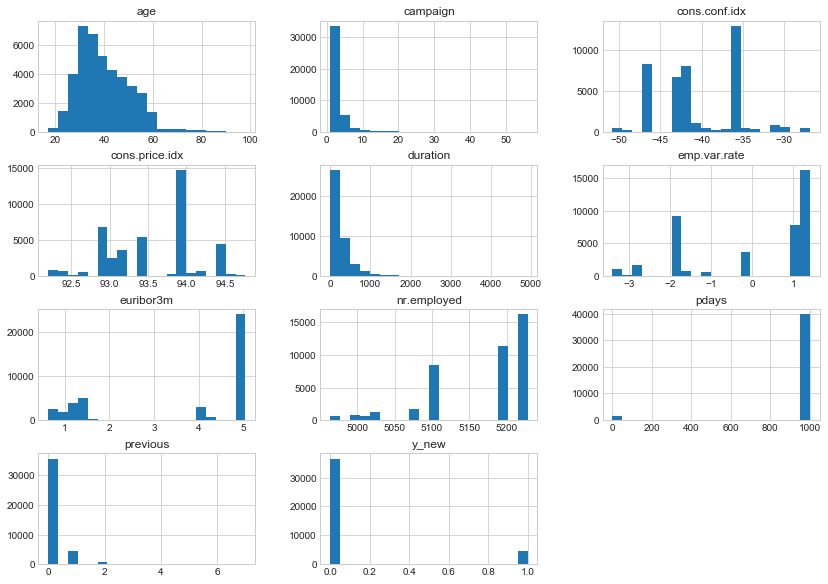

In [8]:
plt.style.use('seaborn-whitegrid')
bank_data2.hist(bins=20,figsize=(14,10))
plt.show()

Now relate independent variables which we refer to features to the dependent variable(the value which we are trying to classify)

In [9]:
labels='Did not opened term','Opened term'

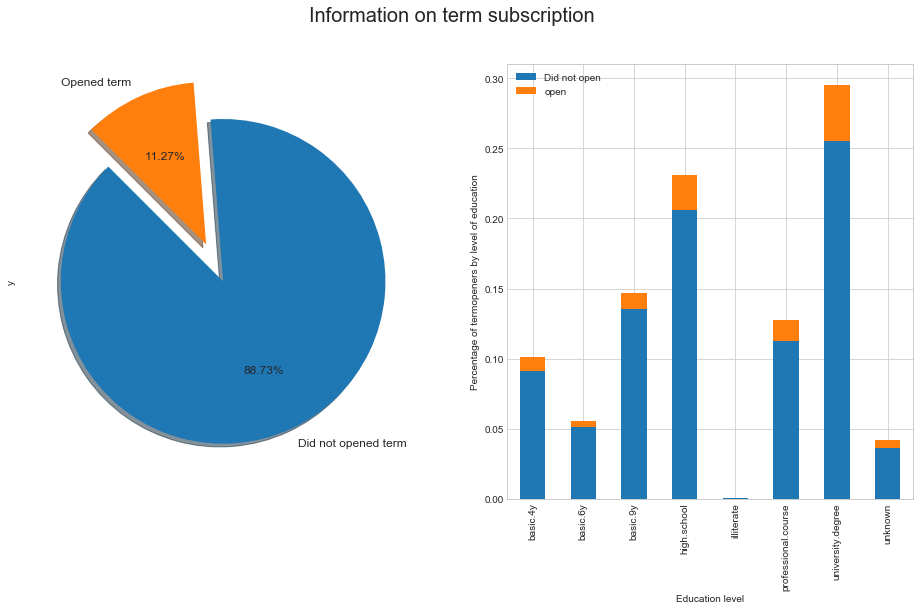

In [10]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
bank_data2['y'].value_counts().plot.pie(explode=[0,0.25],
                                       autopct='%1.2f%%',ax=ax[0],shadow=True,labels=labels,
                                       fontsize=12,startangle=135)
plt.suptitle("Information on term subscription", fontsize=20)
df=bank_data2.groupby(['education','y']).size().groupby(level=0).apply(
lambda x:x/bank_data2.shape[0]).unstack().plot(kind='bar',ax=ax[1],stacked=True)
ax[1].set(ylabel="Percentage of termopeners by level of education")
ax[1].set(xlabel="Education level")
ax[1].legend(['Did not open','open'])

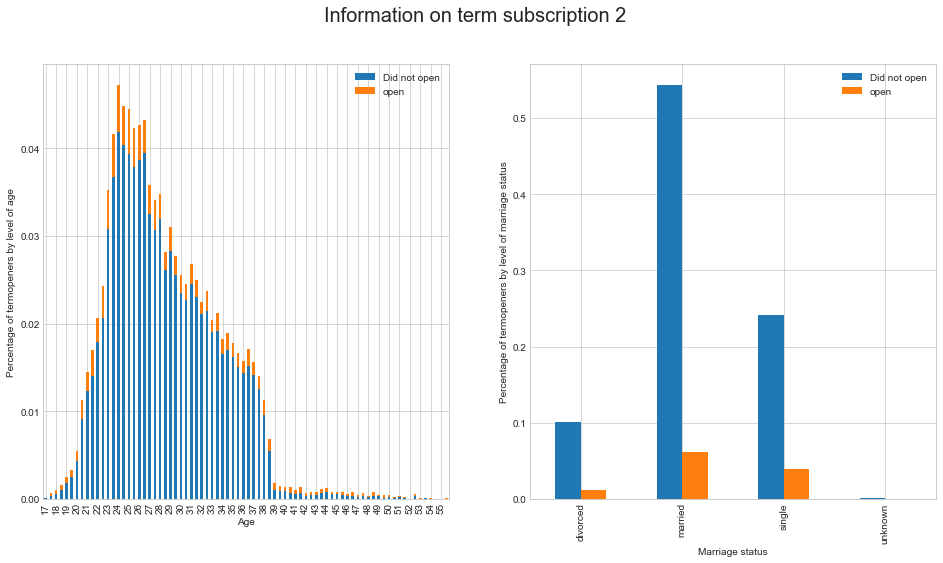

In [11]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
plt.suptitle("Information on term subscription 2", fontsize=20)
df=bank_data2.groupby(['age','y']).size().groupby(level=0,squeeze=True).apply(
lambda x:x/bank_data2.shape[0]).unstack().plot(kind='bar',ax=ax[0],stacked=True)
ax[0].set(ylabel="Percentage of termopeners by level of age")
ax[0].set(xlabel="Age")
ax[0].locator_params(axis='x',nbins=60)
ax[0].legend(['Did not open','open'])
df1=bank_data2.groupby(['marital','y']).size().groupby(level=0).apply(
lambda x:x/bank_data2.shape[0]).unstack().plot(kind='bar',ax=ax[1])
ax[1].set(ylabel="Percentage of termopeners by level of marriage status")
ax[1].set(xlabel="Marriage status")
ax[1].legend(['Did not open','open'])

# Statistical analysis - Feature Selection

In [12]:
#labelencoder-takes categorical values and cast into integers(no.of classes i.e unique strings)
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder=LabelEncoder()

In [14]:
dependent_var=bank_data2['y_new']
encoded_df=bank_data2.copy()

In [15]:
encoded_df=encoded_df.drop(['y','y_new'],axis=1)

In [16]:
encoded_df=encoded_df.apply(encoder.fit_transform)

In [17]:
bank_data2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_new
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [18]:
encoded_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,8,18,16,287,8
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,8,18,16,287,8
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,8,18,16,287,8
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,8,18,16,287,8
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,8,18,16,287,8


In [19]:
encoded_df.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,23.023623,3.72458,1.172769,3.747184,0.208872,1.071720,0.327425,0.365252,4.230868,2.004613,255.084976,1.566840,25.264737,0.172963,0.930101,6.588521,14.196489,10.335656,255.634821,7.845829
std,10.418993,3.59456,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,2.320025,1.397575,238.907418,2.758711,3.832685,0.494901,0.362886,2.797902,5.560136,5.978930,68.665954,2.454812
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,102.000000,0.000000,26.000000,0.000000,1.000000,3.000000,10.000000,6.000000,214.000000,6.000000
50%,21.000000,2.00000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,180.000000,1.000000,26.000000,0.000000,1.000000,8.000000,14.000000,8.000000,287.000000,8.000000
75%,30.000000,7.00000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,319.000000,2.000000,26.000000,0.000000,1.000000,9.000000,18.000000,16.000000,305.000000,10.000000
max,77.000000,11.00000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,1543.000000,41.000000,26.000000,7.000000,2.000000,9.000000,25.000000,25.000000,315.000000,10.000000


#  Model relation
log(y)=e^(B)*X+E
where,<br>
log(y) is the dependent variable,<br>
B is the coefficient weight for each feature,<br>
X is the observed value,<br>
plus the error term E.<br>

In [20]:
#concatenate our dependent variable with newly created encoded(numeric) data frame
encoded_df2=pd.concat([encoded_df,dependent_var],axis=1)

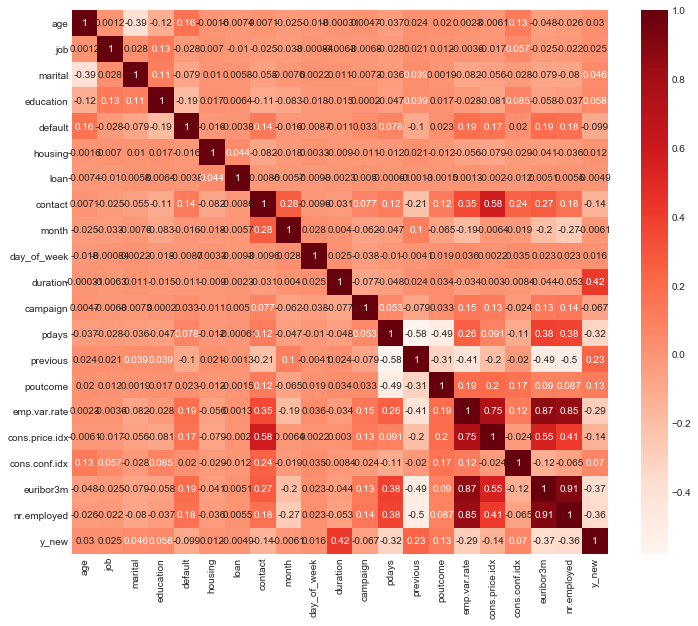

In [21]:
#correlation matrix
plt.figure(figsize=(12,10))
cor=encoded_df2.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

Multicollinearity-correlation features have with each other<br>
where 2 variables have a relationship intern move in a correlated manner either +ve or -ve<br>
this means 2 variables can trend in same direction or in a inverted manner<br>
Since, this is not a Regression process we don't have a statistical significance of each feature<br>
So, we isolate correlated features and remove some features to reduce the dimensionality of our data to increase model performance 

In [22]:
#isolating(picking) features
cor_target=abs(cor['y_new'])
relevant_features=cor_target[cor_target>0.2]
print(relevant_features,'\n')

duration        0.419889
pdays           0.320945
previous        0.230181
emp.var.rate    0.286833
euribor3m       0.368168
nr.employed     0.355135
y_new           1.000000
Name: y_new, dtype: float64 



In [23]:
#drop some features which are not showing good correlation
encoded_df=encoded_df.drop(['age','housing','loan','default','day_of_week'],axis=1)

Splitting the data into training and testing

In [24]:
print(bank_data2.shape)

(41188, 22)


In [25]:
#80% for training data
train_len=int(0.8*(bank_data2.shape[0]))

In [26]:
train_x,train_y=encoded_df[:train_len],dependent_var[:train_len]
test_x,test_y=encoded_df[train_len:],dependent_var[train_len:]

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
#use lbfgs solver for classification and penalty term-Euclidean distance b/w expected and actual values with a max of 10,000 iterations
log_reg=LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000)

In [29]:
#training
log_reg_trained=log_reg.fit(train_x,train_y)

In [30]:
print(f'training accuracy is: {log_reg.score(train_x,train_y)}')

training accuracy is: 0.9412443095599393


In [31]:
#testing
pred=log_reg.predict(test_x)

In [32]:
print(f'test accuracy is {sk.metrics.accuracy_score(test_y,pred)}')

test accuracy is 0.697742170429716


In [33]:
log_reg.coef_

array([[ 0.00535434,  0.09293786,  0.08110473,  0.45880602, -0.05464453,
         0.00536989, -0.03745871, -0.36007073, -3.18944134, -2.42944376,
        -1.10762484, -0.0761795 , -0.05236992,  0.05721638,  0.2454679 ]])

log_reg.coef_ return 12 coefficients for each of the features with the reation to the model being that the log(y)=e^(B)*X+E


We got 69% test accuracy, means our model is 19% better i.e it predicts 19% more accurately<br>
Since, it's a Binary classification we already have 50% of being right :)

# Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dec_tree=DecisionTreeClassifier()

In [36]:
tree_model=dec_tree.fit(train_x,train_y)

In [37]:
print(f'training accuracy for Decision tree is: {dec_tree.score(train_x,train_y)}')

training accuracy for Decision tree is: 0.9999089529590288


In [38]:
pred1=dec_tree.predict(test_x)

In [39]:
print(f'test accuracy for Decision tree is: {sk.metrics.accuracy_score(test_y,pred1)}')

test accuracy for Decision tree is: 0.6257586792910901


Training accuracy: 99%<br>
Test accuracy: 66%<br>
Over fitting Condition
and Decision Tree prediction accuracy is 3% worse than Logistic Regression's

# Using AIX360 to see what features impact our predictions

In [ ]:
#pandas version >=1.0.3
!pip install --upgrage pandas

In [ ]:
#click version >=7.1.1
!pip install --upgrade click

In [ ]:
#scikit-learn>=0.21.2
!pip install --upgrade scikit-learn

In [ ]:
!pip install aix360

In [41]:
from aix360.algorithms.lime import LimeTabularExplainer

In [48]:
class_names=[0,1]
log_lime_explainer=LimeTabularExplainer(train_x.values,class_names=class_names,feature_names=train_x.columns)

In [49]:
print(f'the predicted class is: {log_reg_trained.predict_proba([train_x.values[0]])}')
print(f'the true class is: {train_y.loc[0]}')

the predicted class is: [[0.99133935 0.00866065]]
the true class is: 0


In [51]:
idx=1120
exp_log=log_lime_explainer.explain_instance(train_x.values[idx],
                                           log_reg_trained.predict_proba,
                                           num_features=6,
                                           labels=class_names)

In [53]:
print('Explanation for class %s'%class_names[0])
print('\n'.join(map(str, exp_log.as_list(label=0))))
print('Explanation for class %s'%class_names[1])
print('\n'.join(map(str, exp_log.as_list(label=1))))

Explanation for class 0
('previous <= 0.00', -0.16530816922887523)
('7.00 < emp.var.rate <= 8.00', 0.12132599834593114)
('100.00 < duration <= 175.00', 0.07963803557446668)
('nr.employed <= 8.00', 0.05772119934996048)
('17.00 < cons.price.idx <= 18.00', 0.03215075582831151)
('0.00 < contact <= 1.00', -0.02863675675456415)
Explanation for class 1
('previous <= 0.00', 0.16530816922887528)
('7.00 < emp.var.rate <= 8.00', -0.1213259983459311)
('100.00 < duration <= 175.00', -0.07963803557446668)
('nr.employed <= 8.00', -0.05772119934996049)
('17.00 < cons.price.idx <= 18.00', -0.0321507558283115)
('0.00 < contact <= 1.00', 0.02863675675456415)


In [55]:
exp_log.show_in_notebook()

from the above figures we can conclude that<br>
fearure emp.var.rate has 17% +ve impact on class 0 and 17% -ve impact on class 1<br>
Simillarly to all classes


Lime results relies on 2 metricts<br>
# Monotinicity:
The idea that each added feature increases the ability of the model to discriminate classes.<br>
# Faithfulness:
The correlation b/w the locally perturbed model and the actual model, with the value b/w -1 and 1, Indicating if the local explanation's model is faithful to the original model.<br>
In this case the Logistic regression

In [56]:
from aix360.metrics import faithfulness_metric, monotonicity_metric

In [57]:
predicted_class=log_reg.predict(test_x.values[0].reshape(1,-1))[0]
le=exp_log.local_exp[predicted_class]
m=exp_log.as_map()
x=test_x.values[0]
coefs=np.zeros(x.shape[0])
for v in le:
    coefs[v[0]]=v[1]
base=np.zeros(x.shape[0])
print('Faithfulness:',faithfulness_metric(log_reg,x,coefs,base))
print('Monotonicity:',monotonicity_metric(log_reg,x,coefs,base))

Faithfulness: 0.11097013460696101
Monotonicity: False


Features that contribute the highest probability for class 0 are previos,emp.var.rate each contributing atleat 10% for logistic regression

# LALE seemi automated pipeline - Model selection, Hyperparameter tuning, Explainability

In [59]:
!pip install pandas==0.25.3

Requirement already up-to-date: pandas in g:\ai\anaconda3\lib\site-packages (1.0.3)


In [64]:
!pip install scikit-learn==0.20.3

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=e4c54c1cd8da0a33293d276b325d7662ca8aa2ace235fb70759a7f3f0518a2a8
  Stored in directory: c:\users\prasa\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [68]:
!pip install lale

In [81]:
from lale.lib.sklearn import PCA
from lale.lib.sklearn import LogisticRegression
from lale.lib.sklearn import KNeighboreClassifier as Kn
from lale.lib.sklearn import DecisionTreeClassifier as tree
from lale.lib.sklearn import SVC
from lale.lib.sklearn import RandomForestClassifier as rf
from lale.lib.xgboost import XGBClassifier
from lale.lib.lare import NoOp, ConcatFeatures

OSError: [WinError 126] The specified module could not be found

In [72]:
import sys
for p in sys.path:
    print(p)

C:\Users\prasa\IBM AI explainability
G:\AI\Anaconda3\python37.zip
G:\AI\Anaconda3\DLLs
G:\AI\Anaconda3\lib
G:\AI\Anaconda3

C:\Users\prasa\AppData\Roaming\Python\Python37\site-packages
G:\AI\Anaconda3\lib\site-packages
G:\AI\Anaconda3\lib\site-packages\win32
G:\AI\Anaconda3\lib\site-packages\win32\lib
G:\AI\Anaconda3\lib\site-packages\Pythonwin
G:\AI\Anaconda3\lib\site-packages\IPython\extensions
C:\Users\prasa\.ipython


In [77]:
if os.path.exists(dll_path):
     my_dll = ctypes.cdll.LoadLibrary(dll_path)

NameError: name 'os' is not defined